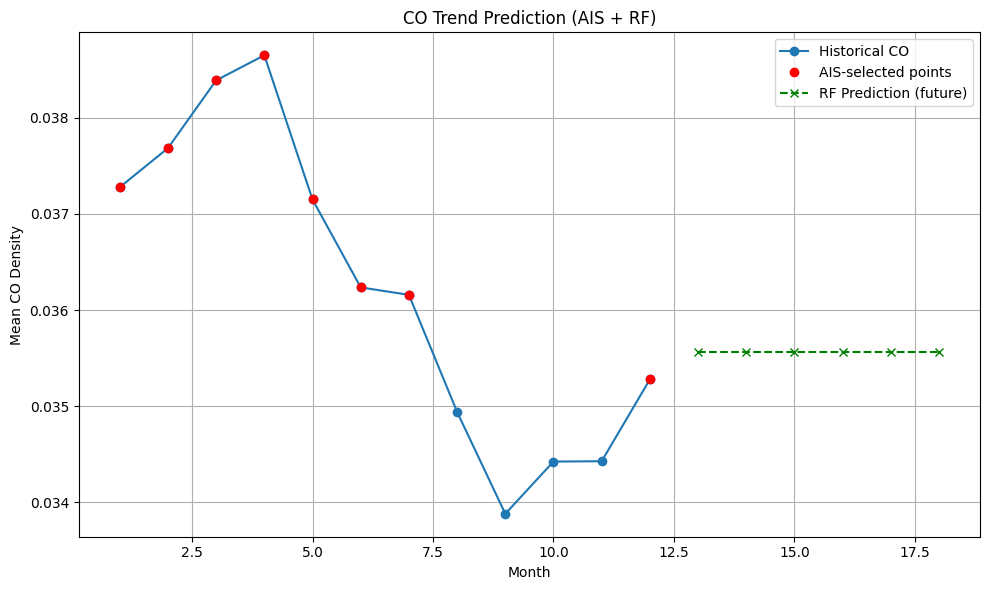

In [1]:
import rasterio
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# === Step 1: Load the .tif image ===
tif_path = r"C:\Users\sagni\Downloads\CO_Maharashtra_June2024.tif"
with rasterio.open(tif_path) as src:
    image = src.read(1)
    profile = src.profile

# === Step 2: Mask invalid values ===
image = np.where((image == 0) | (np.isnan(image)), np.nan, image)

# === Step 3: Flatten valid pixel values ===
valid_pixels = image[~np.isnan(image)].flatten()

# === Step 4: Simulate monthly historical trend ===
# We will simulate CO trends for 12 months (you can update this with real images)
months = np.arange(1, 13)
np.random.seed(42)
mean_values = valid_pixels.mean() + np.sin(months / 2) * 0.002 + np.random.randn(12) * 0.0005

# === Step 5: Prepare training data ===
df = pd.DataFrame({'month': months, 'co_value': mean_values})

# === Step 6: AIS-style selection (antibody filtering - top N patterns) ===
def ais_selection(values, top_n=8):
    sorted_idx = np.argsort(values)[-top_n:]
    return months[sorted_idx], values[sorted_idx]

sel_months, sel_values = ais_selection(mean_values)

# === Step 7: Train Random Forest model ===
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(sel_months.reshape(-1, 1), sel_values)

# === Step 8: Predict for next 6 months ===
future_months = np.arange(13, 19).reshape(-1, 1)
future_preds = rf.predict(future_months)

# === Step 9: Plot trend ===
plt.figure(figsize=(10, 6))
plt.plot(months, mean_values, marker='o', label='Historical CO')
plt.plot(sel_months, sel_values, 'ro', label='AIS-selected points')
plt.plot(future_months, future_preds, 'g--', marker='x', label='RF Prediction (future)')
plt.xlabel("Month")
plt.ylabel("Mean CO Density")
plt.title("CO Trend Prediction (AIS + RF)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
!pip install GDAL


     ---------------------------------------- 0.0/878.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/878.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/878.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/878.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/878.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/878.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/878.2 kB ? eta -:--:--
     --------------------- -------------- 524.3/878.2 kB 381.0 kB/s eta 0:00:01
     --------------------- -------------- 524.3/878.2 kB 381.0 kB/s eta 0:00:01
     --------------------- -------------- 524.3/878.2 kB 381.0 kB/s eta 0:00:01
     -------------------------------- --- 786.4/878.2 kB 409.0 kB/s eta 0:00:01
     ------------------------------------ 878.2/878.2 kB 437.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished 

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [130 lines of output]
  C:\Users\sagni\AppData\Local\Temp\pip-build-env-szqyiezy\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `license` overwritten by `pyproject.toml`
    corresp(dist, value, root_dir)
  C:\Users\sagni\AppData\Local\Temp\pip-build-env-szqyiezy\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `extras_require` overwritten in `pyproject.toml` (optional-dependencies)
    corresp(dist, value, root_dir)
  Using numpy 2.3.2
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdal.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdalnumeric.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdal_array.py -> build\lib.win-amd64-cpython-311\osgeo
  copying osgeo\gdal_fsspec.

In [6]:
!pip install rasterio scikit-learn pmdarima matplotlib pandas numpy


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/614.7 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/614.7 kB ? eta -:--:--
   -------------------------------- ----- 524.3/614.7 kB 762.0 kB/s eta 0:00:01
   -------------------------------------- 614.7/614.7 kB 627.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 599.9 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.7 MB 599.9 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2

✅ Shape: (53, 73, 93)
✅ Selected pixel: row=0, col=20


C:\Users\sagni\AppData\Local\Temp\ipykernel_13940\171997452.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CO'] = df['CO'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


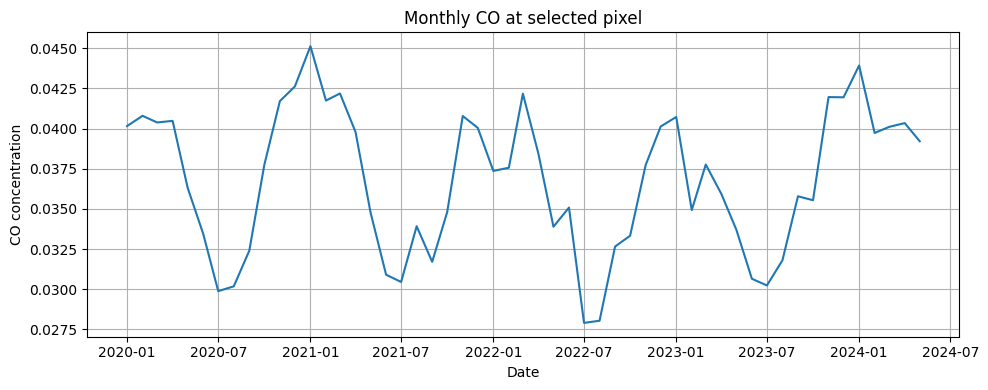

C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

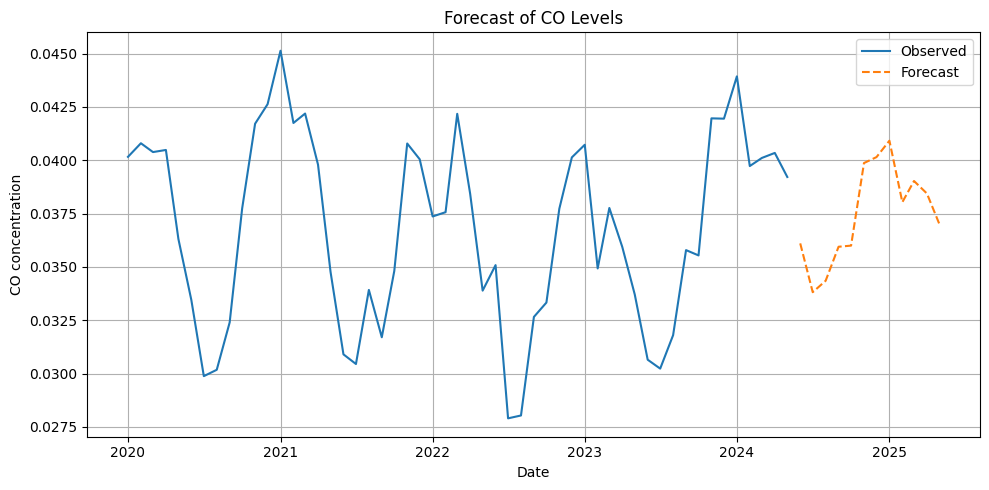

✅ Forecast plot saved to: C:\Users\sagni\Downloads\Pollution controller\CO_Forecast_Plot.png


In [9]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import os

# === Load Data
tif_path = r"C:\Users\sagni\Downloads\CO_Maharashtra_Monthly_2020_2024.tif"
with rasterio.open(tif_path) as src:
    data = src.read()  # (time, height, width)

print(f"✅ Shape: {data.shape}")  # Expect (time, height, width)

# === Find a pixel with valid data
def find_valid_pixel(data):
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            series = data[:, i, j]
            if np.isfinite(series).sum() > len(series) * 0.8:  # At least 80% non-NaN
                return pd.Series(series), (i, j)
    return None, None

series, (row, col) = find_valid_pixel(data)
if series is None:
    raise ValueError("❌ No valid pixel found with enough data.")
print(f"✅ Selected pixel: row={row}, col={col}")

# === Create DataFrame and clean
dates = pd.date_range(start='2020-01-01', periods=len(series), freq='MS')
df = pd.DataFrame({'Date': dates, 'CO': series})
df.set_index('Date', inplace=True)

# Fill missing values (linear or ffill can also be used)
df['CO'] = df['CO'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# === Plot original series
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['CO'], label='Observed CO')
plt.title("Monthly CO at selected pixel")
plt.xlabel("Date")
plt.ylabel("CO concentration")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Forecast with Auto-ARIMA
model = auto_arima(df['CO'], seasonal=True, m=12, error_action='ignore', suppress_warnings=True)
n_forecast = 12
forecast = model.predict(n_periods=n_forecast)

# === Create forecast DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='MS')
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast_CO': forecast})
forecast_df.set_index('Date', inplace=True)

# === Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['CO'], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast_CO'], label='Forecast', linestyle='--')
plt.title("Forecast of CO Levels")
plt.xlabel("Date")
plt.ylabel("CO concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
output_dir = r"C:\Users\sagni\Downloads\Pollution controller"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "CO_Forecast_Plot.png")
plt.savefig(plot_path)
plt.show()

print(f"✅ Forecast plot saved to: {plot_path}")


✅ Data shape: (53, 73, 93) (T, H, W)


C:\Users\sagni\AppData\Local\Temp\ipykernel_13940\3468981345.py:14: RuntimeWarning: Mean of empty slice
  avg_map = np.nanmean(np.where(data == 0, np.nan, data), axis=0)
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


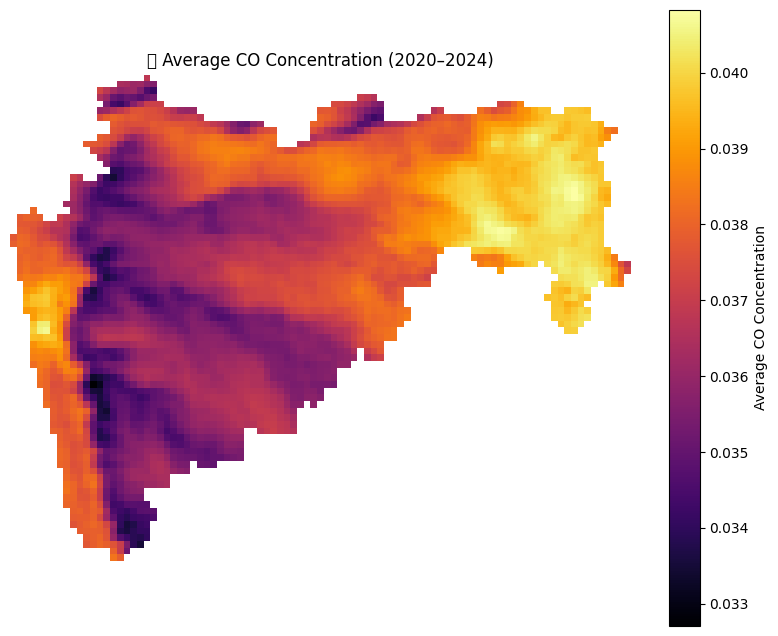

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# === Load the GeoTIFF
path = r"C:\Users\sagni\Downloads\CO_Maharashtra_Monthly_2020_2024.tif"
with rasterio.open(path) as src:
    data = src.read()  # Shape: (T, H, W)
    profile = src.profile

print(f"✅ Data shape: {data.shape} (T, H, W)")

# === Compute mean over time (axis 0)
avg_map = np.nanmean(np.where(data == 0, np.nan, data), axis=0)

# === Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(avg_map, cmap='inferno')
plt.colorbar(label='Average CO Concentration')
plt.title('🗺️ Average CO Concentration (2020–2024)')
plt.axis('off')
plt.show()
